# Reliability/adverse events simulation

This notebook creates a data set that simulates treatment length dependent adverse effects (TLAEs). In general, most adverse effects are constant over time, and may even slightly decrease with time since treatment start. However, some (e.g. myelosuppression, agranulocytosis, accumulation, PML for neuroimmunosuppressants) increase at a critical time. 

This code creates a data set that shows five adverse effects with three different behaviours:

* constant incidence (follows a scaled Weibull distribution):
    - redness/swelling at injection site
    - nausea/vomiting
    - headache
* constant-differential incidence (follows a $\beta$ distribution):
    - leukopaenia (low WBC)
* outlier incidence (steady, then rapidly rising, then steady again):
    - encephalopathy
    
The data set shows treatment weeks (`TW`), condition (`sfx`) and incidence of the side effect per 1,000 patients (`incidence`) for a follow-up of 250 weeks.

In [1]:
import random
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
tw = pd.Series(range(1, 250))

In [3]:
redness_swelling = pd.Series(np.random.weibull(0.8, size=250))
n_v = pd.Series(0.8 * np.random.weibull(1.2, size=250))
headache = pd.Series(0.6 * np.random.weibull(2, size=250))
leukopaenia = pd.Series(0.1 * (np.random.standard_exponential(250)**2))
encephalopathy = pd.Series((50 * (np.random.beta(5, 2)) * stats.norm.pdf(
    np.arange(1, 251, 1), 100, 6)) + 0.03 * np.random.uniform(0, 10, 250))

In [4]:
df = pd.DataFrame(data = [redness_swelling, n_v, headache, leukopaenia, encephalopathy]).T

In [5]:
df.columns = ["redness_swelling", "nausea_vomiting", "headache", "leukopaenia", "encephalopathy"]
df["TW"] = df.index

In [6]:
df = df.melt(id_vars=("TW"),
        value_name="incidence", var_name="sfx")

In [7]:
df

,TW,sfx,incidence
0,0,redness_swelling,1.254743
1,1,redness_swelling,0.187547
2,2,redness_swelling,3.793008
3,3,redness_swelling,3.743907
4,4,redness_swelling,1.284853
...,...,...,...
1245,245,encephalopathy,0.062957
1246,246,encephalopathy,0.149006
1247,247,encephalopathy,0.133752
1248,248,encephalopathy,0.107816


<AxesSubplot:xlabel='TW'>

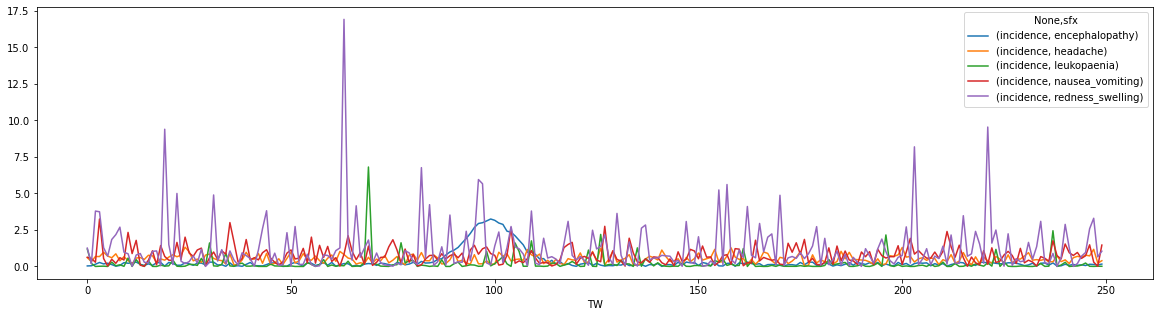

In [8]:
df.groupby(['TW','sfx']).sum().unstack().plot(figsize=(20,5))

In [9]:
df.to_csv("reliability-adverse-events.csv")